<a href="https://www.kaggle.com/code/heemalichaudhari/data-visualization-best-artworks-of-all-time?scriptVersionId=115105832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Importing data

In [2]:
df=pd.read_csv("../input/best-artworks-of-all-time/artists.csv")

# Displaying the first five rows:

In [3]:
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


# Displaying last five rows

In [4]:
df.tail()

,id,name,years,genre,nationality,bio,wikipedia,paintings
45,45,Andy Warhol,1928 – 1987,Pop Art,American,"Andy Warhol (; born Andrew Warhola; August 6, ...",https://en.wikipedia.org/wiki/Andy_Warhol,181
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109
48,48,Michelangelo,1475 – 1564,High Renaissance,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49
49,49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,"Paul Jackson Pollock (; January 28, 1912 – Aug...",http://en.wikipedia.org/wiki/Jackson_Pollock,24


In [5]:
df.drop(["id","bio","wikipedia"],axis=1,inplace=True)

In [6]:
df.head()

,name,years,genre,nationality,paintings
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
3,Claude Monet,1840 - 1926,Impressionism,French,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194


In [7]:
df_year = pd.DataFrame(df.years.str.split(' ',2).tolist(),columns = ['birth','-','death'])
df_year.drop(["-"],axis=1,inplace=True)
df["birth"]=df_year.birth
df["death"]=df_year.death
df.drop(["years"],axis=1,inplace=True)

# Data Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         50 non-null     object
 1   genre        50 non-null     object
 2   nationality  50 non-null     object
 3   paintings    50 non-null     int64 
 4   birth        50 non-null     object
 5   death        50 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


In [9]:
df["birth"]=df["birth"].apply(lambda x: int(x))
df["death"]=df["death"].apply(lambda x: int(x))

In [10]:
df["age"]=df.death-df.birth

In [11]:
df.age.describe()

count    50.00000
mean     64.78000
std      16.74087
min      32.00000
25%      55.25000
50%      65.50000
75%      77.50000
max      98.00000
Name: age, dtype: float64

In [12]:
df['age']=df['age']
bins=[30,55,65,77,98]
labels=["young adult","early adult","adult","senior"]
df['age_group']=pd.cut(df['age'],bins,labels=labels)

In [13]:
df.tail()

,name,genre,nationality,paintings,birth,death,age,age_group
45,Andy Warhol,Pop Art,American,181,1928,1987,59,early adult
46,Paul Gauguin,"Symbolism,Post-Impressionism",French,311,1848,1903,55,young adult
47,Raphael,High Renaissance,Italian,109,1483,1520,37,young adult
48,Michelangelo,High Renaissance,Italian,49,1475,1564,89,senior
49,Jackson Pollock,Abstract Expressionism,American,24,1912,1956,44,young adult


In [14]:
df = df.sort_values(by=["age"], ascending=False)
df['rank']=tuple(zip(df.age))
df['rank']=df.groupby('age',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.drop(["rank"],axis=1,inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

,name,genre,nationality,paintings,birth,death,age,age_group
0,Marc Chagall,Primitivism,"French,Jewish,Belarusian",239,1887,1985,98,senior
1,Pablo Picasso,Cubism,Spanish,439,1881,1973,92,senior
2,Joan Miro,Surrealism,Spanish,102,1893,1983,90,senior
3,Michelangelo,High Renaissance,Italian,49,1475,1564,89,senior
4,Titian,"High Renaissance,Mannerism",Italian,255,1488,1576,88,senior


In [15]:
df.sample(5)

,name,genre,nationality,paintings,birth,death,age,age_group
29,Diego Velazquez,Baroque,Spanish,128,1599,1660,61,early adult
43,Jackson Pollock,Abstract Expressionism,American,24,1912,1956,44,young adult
16,Piet Mondrian,Neoplasticism,Dutch,84,1872,1944,72,adult
46,Raphael,High Renaissance,Italian,109,1483,1520,37,young adult
47,Vincent van Gogh,Post-Impressionism,Dutch,877,1853,1890,37,young adult


In [16]:
df.describe()

,paintings,birth,death,age
count,50.000000,50.000000,50.000000,50.00000
mean,168.920000,1737.820000,1802.600000,64.78000
std,157.451105,187.213693,188.773377,16.74087
min,24.000000,1266.000000,1337.000000,32.00000
25%,81.000000,1572.500000,1620.500000,55.25000
50%,123.000000,1839.500000,1902.000000,65.50000
75%,191.750000,1871.250000,1943.000000,77.50000
max,877.000000,1928.000000,1989.000000,98.00000


In [17]:
df.isnull().sum()

name           0
genre          0
nationality    0
paintings      0
birth          0
death          0
age            0
age_group      0
dtype: int64

In [18]:
df.nunique()

name           50
genre          31
nationality    17
paintings      48
birth          48
death          45
age            37
age_group       4
dtype: int64

# Nationality

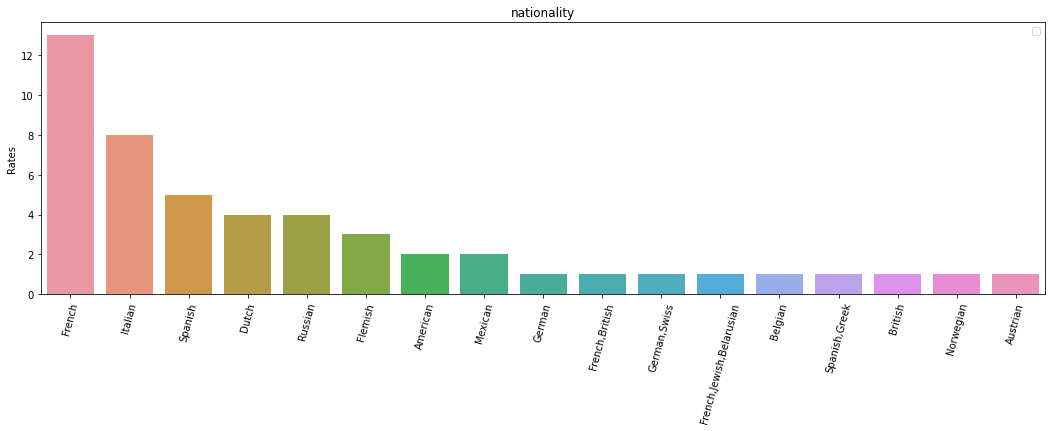

In [19]:
plt.figure(figsize=(18,5))

sns.barplot(x=df['nationality'].value_counts().index,y=df['nationality'].value_counts().values)
plt.title('nationality')
plt.xticks(rotation=75)
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

# Genre Bar Plot

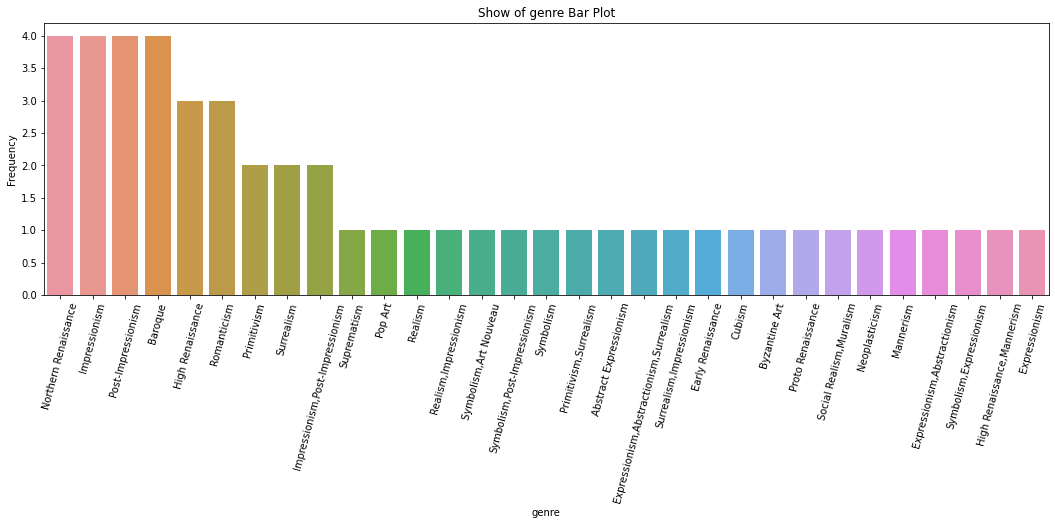

In [20]:
plt.figure(figsize=(18,5))
sns.barplot(x=df['genre'].value_counts().index,
              y=df['genre'].value_counts().values)
plt.xlabel('genre')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('Show of genre Bar Plot')
plt.show()

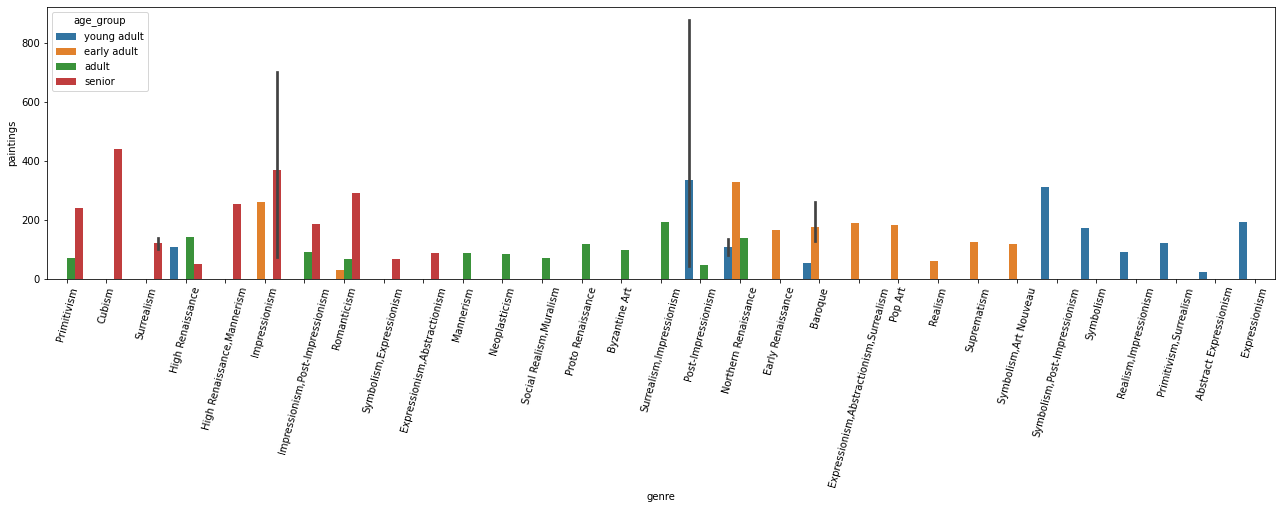

In [21]:
plt.figure(figsize=(22,5))
sns.barplot(x = "genre", y = "paintings", hue = "age_group", data = df)
plt.xticks(rotation=75)
plt.show()

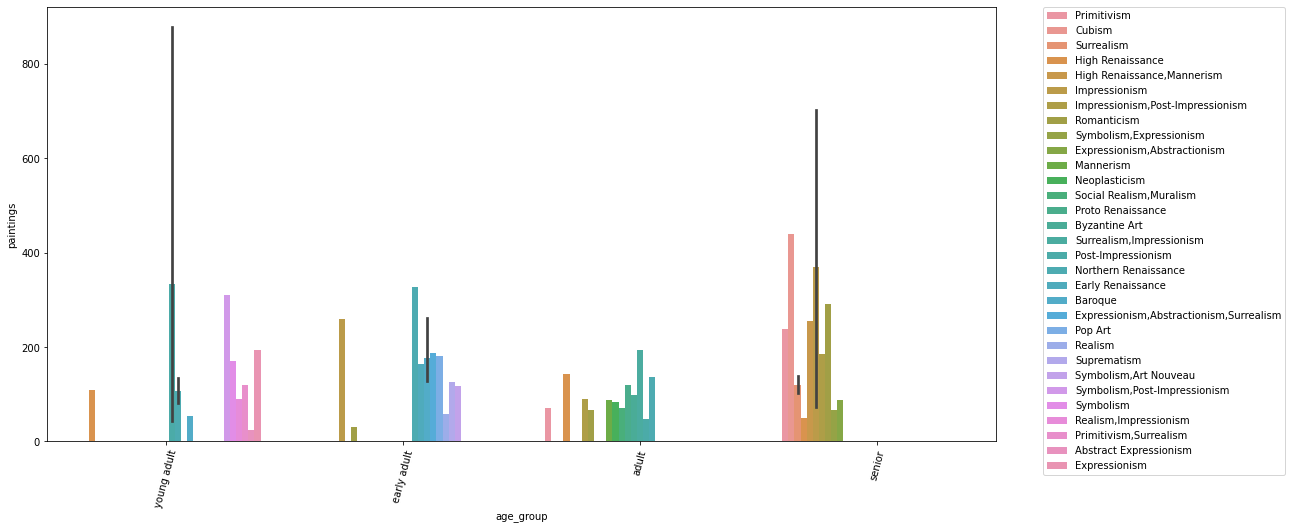

In [22]:
plt.figure(figsize=(17,8))
sns.barplot(x = "age_group", y = "paintings", hue = "genre", data = df)
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Age group Vs Genre

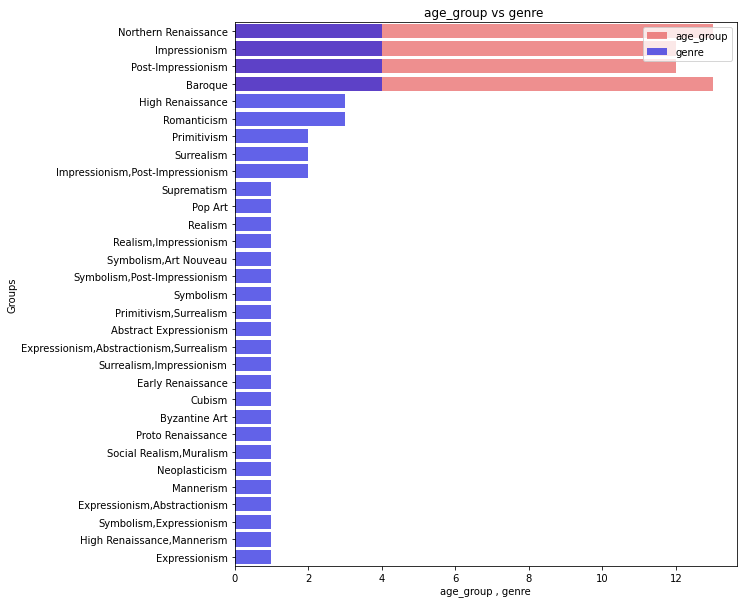

In [23]:
f,ax=plt.subplots(figsize=(9,10))
sns.barplot(x=df['age_group'].value_counts().values,y=df['age_group'].value_counts().index,alpha=0.5,color='red',label='age_group')
sns.barplot(x=df['genre'].value_counts().values,y=df['genre'].value_counts().index,color='blue',alpha=0.7,label='genre')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='age_group , genre',ylabel='Groups',title="age_group vs genre ")
plt.show()

# Age>50 & Paintings

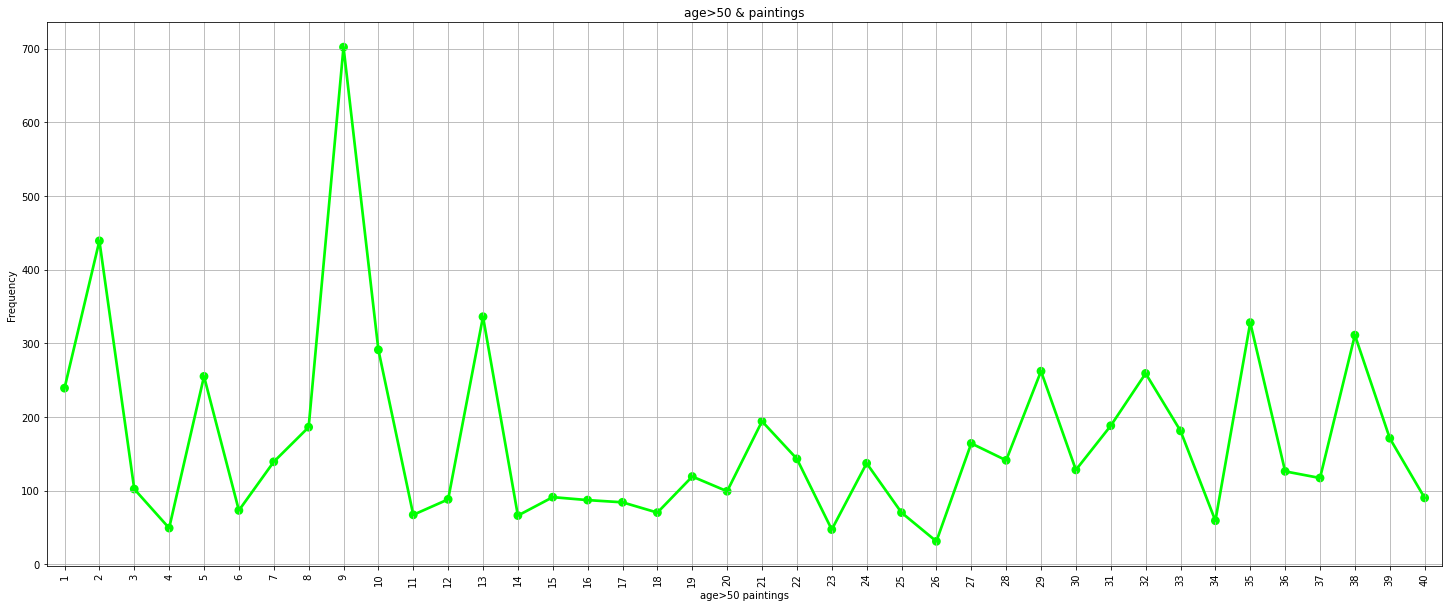

In [24]:
df['age'].unique()
len(df[(df['age']>50)].paintings)
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,41),y=df[(df['age']>50)].paintings,color='lime',alpha=0.8)

plt.xlabel('age>50 paintings')
plt.ylabel('Frequency')
plt.title('age>50 & paintings')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Young Adult Frequency Paintings

<Figure size 720x720 with 0 Axes>

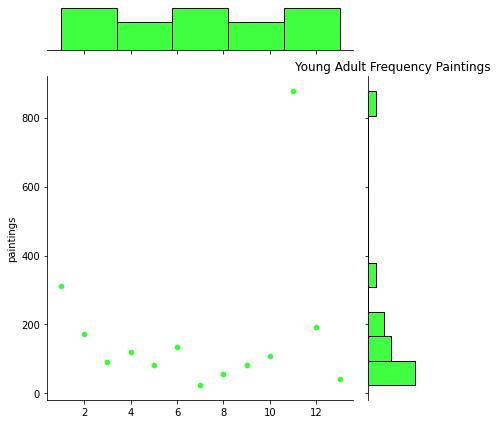

In [25]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,14),y=df[(df['age_group']=='young adult')].paintings,color='lime',alpha=0.8)
plt.xlabel('Young Adult index State')
plt.ylabel('Frequency')
plt.title('Young Adult Frequency Paintings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Senior Frequency Paintings

<Figure size 720x720 with 0 Axes>

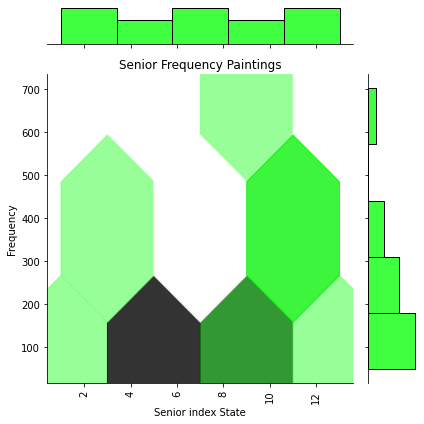

In [26]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,14),y=df[(df['age_group']=='senior')].paintings,color='lime',kind='hex',alpha=0.8)
plt.xlabel('Senior index State')
plt.ylabel('Frequency')
plt.title('Senior Frequency Paintings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
df.age_group.unique()

['senior', 'adult', 'early adult', 'young adult']
Categories (4, object): ['young adult' < 'early adult' < 'adult' < 'senior']

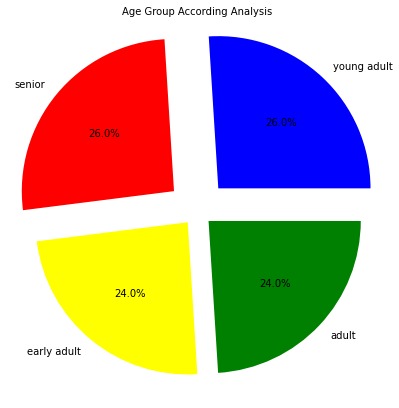

In [28]:
labels=df['age_group'].value_counts().index
colors=['blue','red','yellow','green']
explode=[0.2,0.2,0.1,0.1,]
values=df['age_group'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Age Group According Analysis',color='black',fontsize=10)
plt.show()

# Age Vs Paintings

<Figure size 1080x504 with 0 Axes>

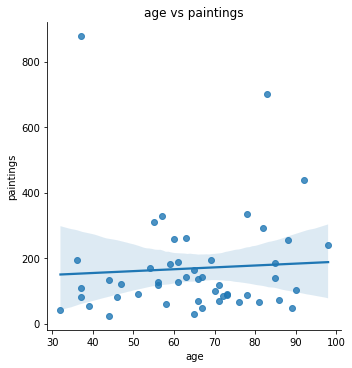

In [29]:
plt.figure(figsize=(15,7))
sns.lmplot(x='age',y='paintings',data=df)
plt.xlabel('age')
plt.ylabel('paintings')
plt.title('age vs paintings')
plt.show()

# Paintings Kde Plot System Analysis

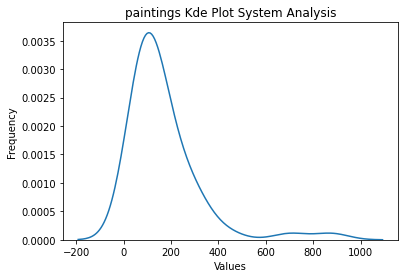

In [30]:
sns.kdeplot(df['paintings'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('paintings Kde Plot System Analysis')
plt.show()

#  Violin paintings Show

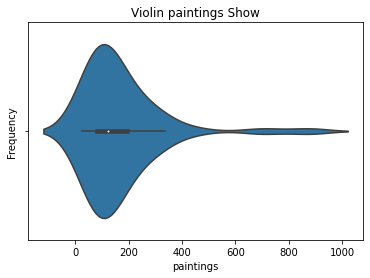

In [31]:
sns.violinplot(df['paintings'])
plt.xlabel('paintings')
plt.ylabel('Frequency')
plt.title('Violin paintings Show')
plt.show()

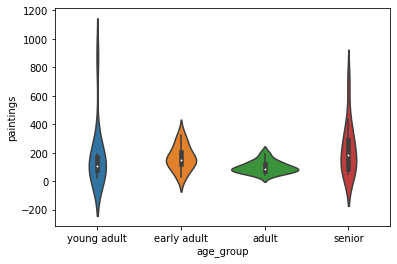

In [32]:
sns.violinplot(x=df['age_group'],y=df['paintings'])
plt.show()

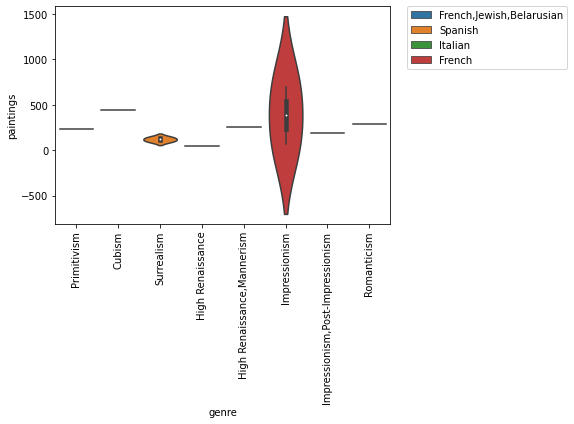

In [33]:
sns.violinplot(df['genre'][:10],df['paintings'][:10],hue=df['nationality'][:10],dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

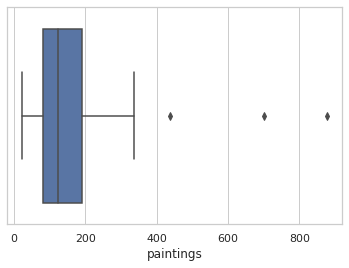

In [34]:
sns.set(style='whitegrid')
sns.boxplot(df['paintings'])
plt.show()

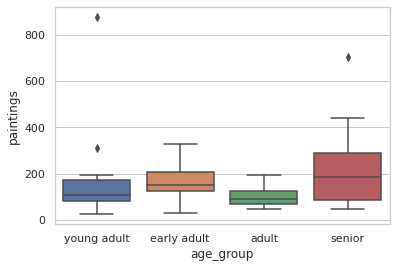

In [35]:
sns.boxplot(x=df['age_group'],y=df['paintings'])
plt.show()

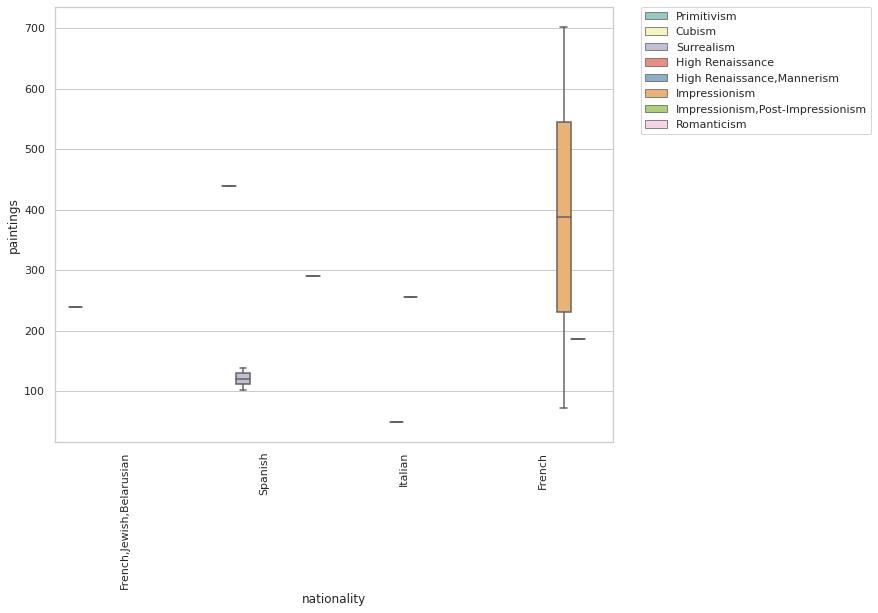

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['nationality'][:10],y=df['paintings'][:10],hue=df['genre'][:10],palette="Set3")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

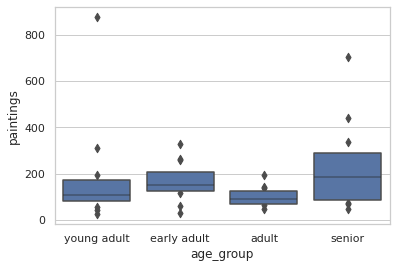

In [37]:
sns.boxenplot(x="age_group", y="paintings",
              color="b",
              scale="linear", data=df)
plt.show()

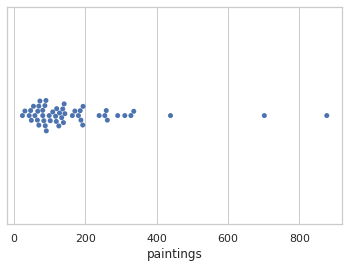

In [38]:
sns.set(style='whitegrid')
sns.swarmplot(x=df['paintings'])
plt.show()

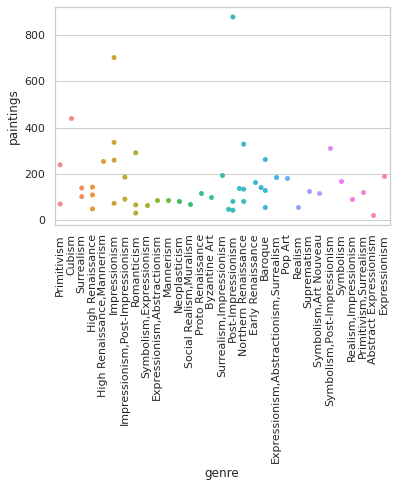

In [39]:
sns.swarmplot(x=df['genre'],y=df['paintings'])
plt.xticks(rotation=90)
plt.show()

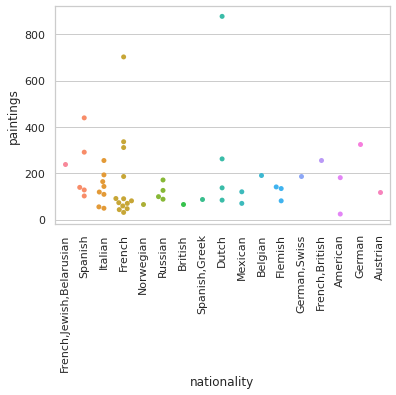

In [40]:
sns.swarmplot(x=df['nationality'],y=df['paintings'])
plt.xticks(rotation=90)
plt.show()

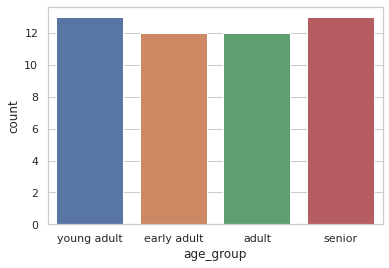

In [41]:
sns.countplot(df['age_group'])
plt.show()

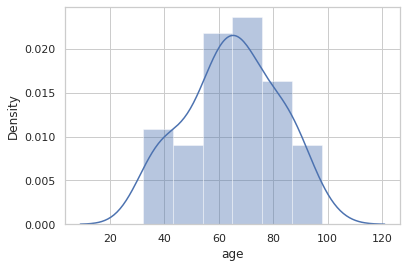

In [42]:
ax = sns.distplot(df['age'])
plt.show()

In [43]:
df[df.age>85]

,name,genre,nationality,paintings,birth,death,age,age_group
0,Marc Chagall,Primitivism,"French,Jewish,Belarusian",239,1887,1985,98,senior
1,Pablo Picasso,Cubism,Spanish,439,1881,1973,92,senior
2,Joan Miro,Surrealism,Spanish,102,1893,1983,90,senior
3,Michelangelo,High Renaissance,Italian,49,1475,1564,89,senior
4,Titian,"High Renaissance,Mannerism",Italian,255,1488,1576,88,senior
5,Claude Monet,Impressionism,French,73,1840,1926,86,senior


In [44]:
x=df[df.age>60].groupby('nationality')['paintings'].count().reset_index()
x

,nationality,paintings
0,Belgian,1
1,British,1
2,Dutch,3
3,Flemish,1
4,French,8
5,"French,Jewish,Belarusian",1
6,"German,Swiss",1
7,Italian,5
8,Mexican,1
9,Norwegian,1


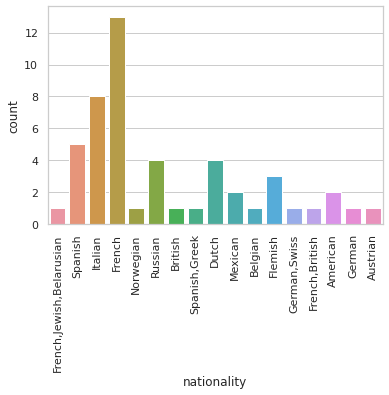

In [45]:
sns.countplot(df['nationality'])
plt.xticks(rotation=90)
plt.show()

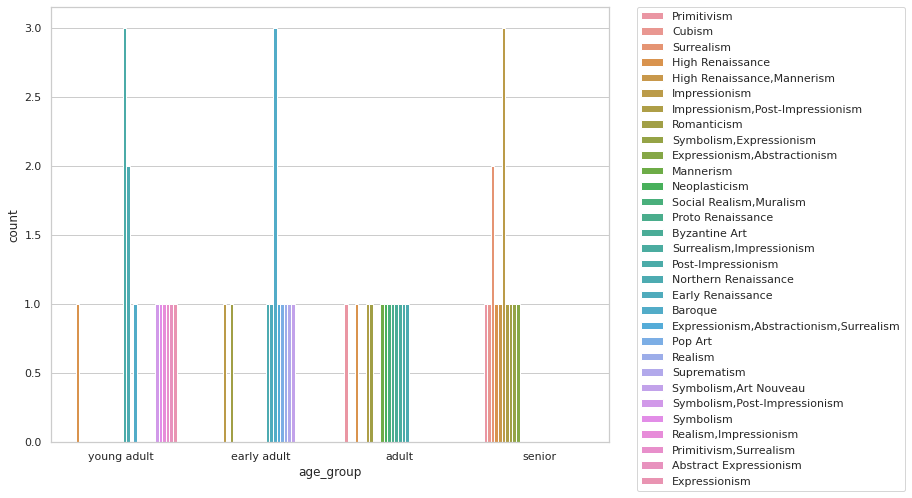

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(df['age_group'],hue=df['genre'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

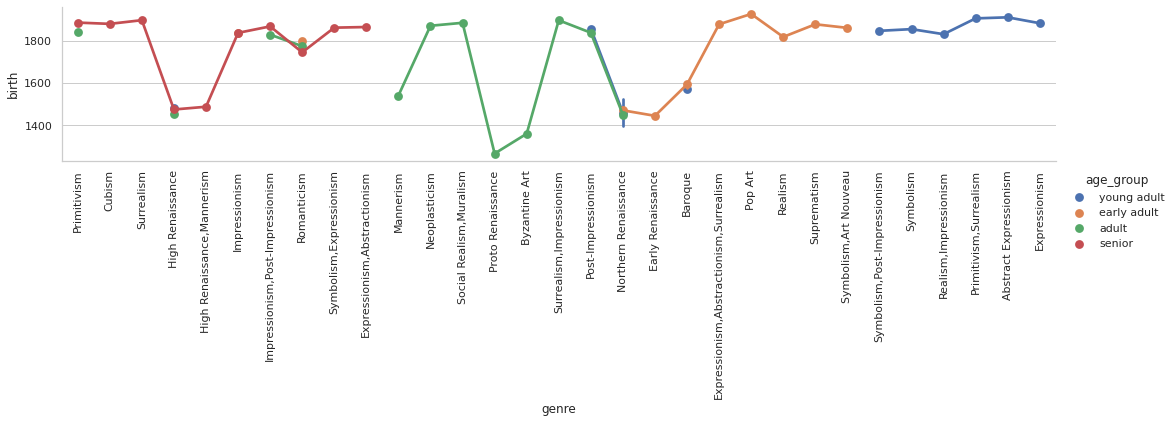

In [47]:
sns.factorplot(x="genre", y="birth", hue="age_group", data=df,size=3, aspect=5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

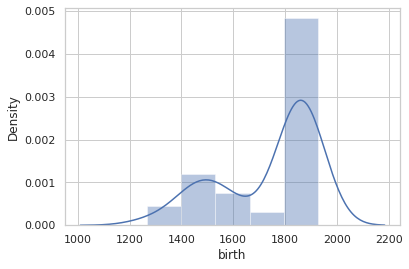

In [48]:
ax = sns.distplot(df['birth'])
plt.show()

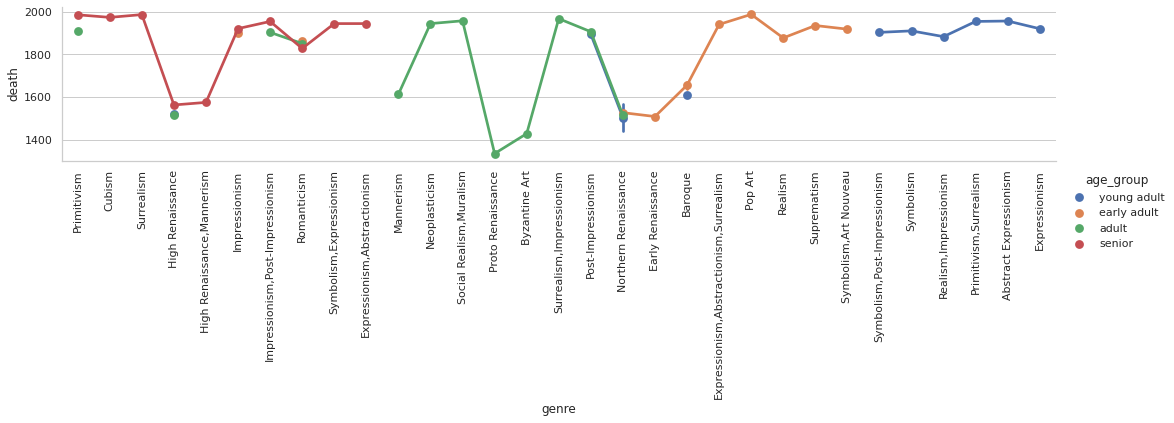

In [49]:
sns.factorplot(x="genre", y="death", hue="age_group", data=df,size=3, aspect=5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

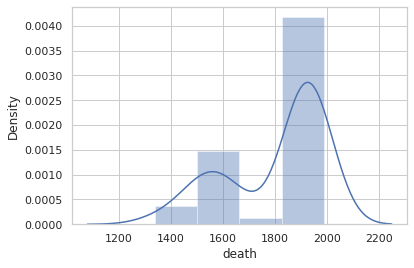

In [50]:
ax = sns.distplot(df['death'])
plt.show()

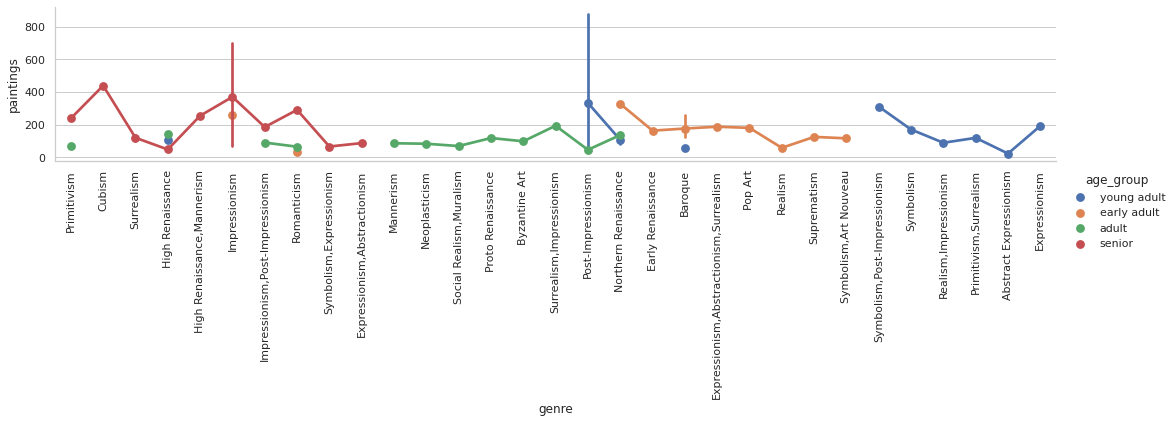

In [51]:
sns.factorplot(x="genre", y="paintings", hue="age_group", data=df,size=3, aspect=5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

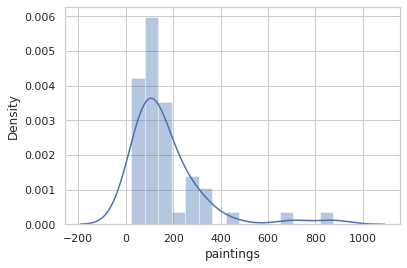

In [52]:
ax = sns.distplot(df['paintings'])
plt.show()

In [53]:
df[df['paintings']>750]

,name,genre,nationality,paintings,birth,death,age,age_group
47,Vincent van Gogh,Post-Impressionism,Dutch,877,1853,1890,37,young adult
